## Import the dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [3,4]].values ## no DV, and we seslect col 3,4 for beginer learning to visualize in 2-d plot :)

## Elbow method - WCSS
decide optimum num of clusters

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30241.34361793659, 25336.946861471864, 21850.165282585633, 19634.55462934998]


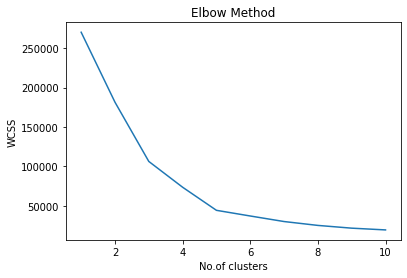

In [11]:
from sklearn.cluster import KMeans
wcss = []  ##we are going to populate the wcss list to find the optimum no.of C
for i in range (1,11): ##to find how many num of C is opt ranging from 1-10
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  ##init = 'k-means++' to correct the Random initialization of Centroids Trap
  kmeans.fit(X)   ##training the model
  ##we have an attribute of KMeans class to find the WCSS val i.e KMeans.inertia_
  wcss.append(kmeans.inertia_)

print (wcss)
##plotting the elbow curve
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

##choose the C where WCSS starts to dec gradually, here it is C = 5

fit_predict() -- returns the DV :)

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print (y_kmeans)  ## which cluster the customer belong

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


##Visualize

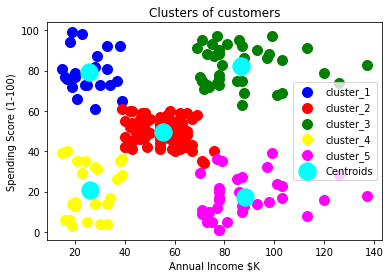

In [19]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='blue', label = 'cluster_1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='red', label = 'cluster_2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label = 'cluster_3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='yellow', label = 'cluster_4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label = 'cluster_5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'cyan', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income $K')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
